In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
stroke[('stroke')].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
shuffled_data = stroke.sample(frac=1,random_state=4)
stroke_df = stroke.loc[stroke['stroke'] == 1]
non_stroke_df = stroke.loc[stroke['stroke'] == 0].sample(n= 3500,random_state= 101)

In [ ]:
normalized_stroke = pd.concat([stroke_df, non_stroke_df])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


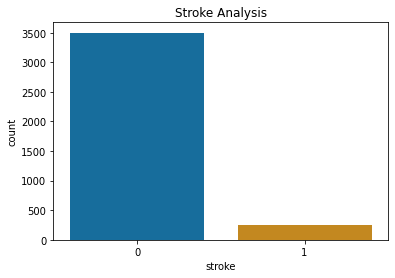

In [ ]:
sns.countplot('stroke', data= normalized_stroke, palette= "colorblind")
plt.title('Stroke Analysis')
plt.show()

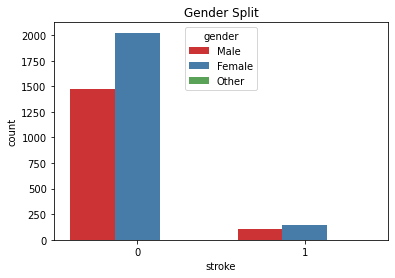

In [ ]:
sns.countplot(x='stroke', hue = 'gender', data = normalized_stroke, palette = "Set1")
plt.title('Gender Split')
plt.show()

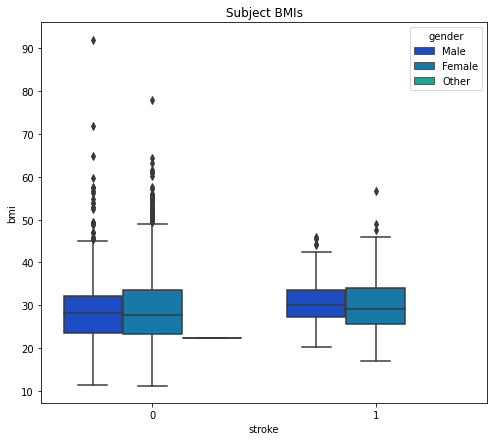

In [ ]:
plt.figure(figsize=(8,7))
sns.boxplot(x = 'stroke', y = 'bmi', hue = 'gender', data= normalized_stroke, palette= "winter")
plt.title('Subject BMIs')
plt.show()

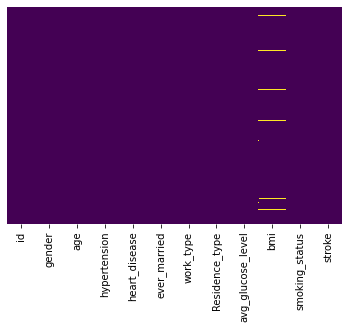

In [ ]:
sns.heatmap(normalized_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
def input_bmi(cols):
    bmi = cols[0]
    stroke = cols [1]
   
    
    if pd.isnull(bmi):
        return 28.6
    else:
        return bmi

In [ ]:
normalized_stroke['bmi'] = stroke[['bmi', 'stroke']].apply(input_bmi, axis=1)

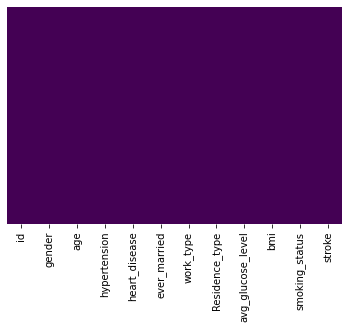

In [ ]:
sns.heatmap(normalized_stroke.isnull(), yticklabels=False, cbar=False, cmap='viridis')

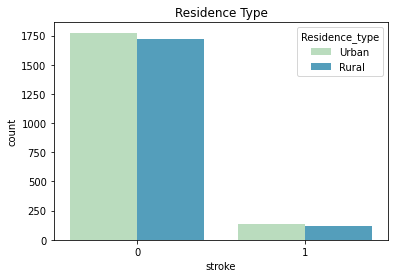

In [ ]:
sns.countplot(x='stroke', hue = 'Residence_type', data =normalized_stroke, palette = 'GnBu')
plt.title('Residence Type')
plt.show()

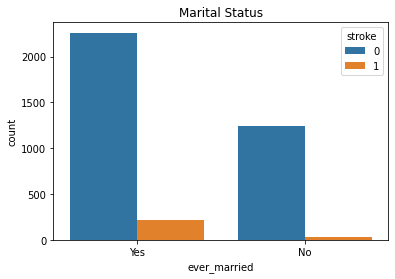

In [ ]:
sns.countplot(x='ever_married', hue = 'stroke', data = normalized_stroke)
plt.title('Marital Status')
plt.show()

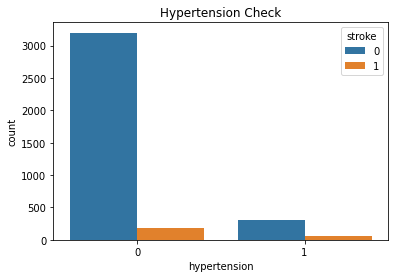

In [ ]:
sns.countplot(x='hypertension', hue = 'stroke', data = normalized_stroke)
plt.title('Hypertension Check')
plt.show()

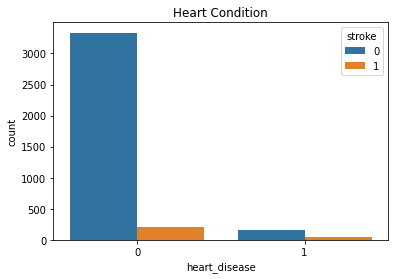

In [ ]:
sns.countplot(x='heart_disease', hue = 'stroke', data = normalized_stroke)
plt.title('Heart Condition')
plt.show()

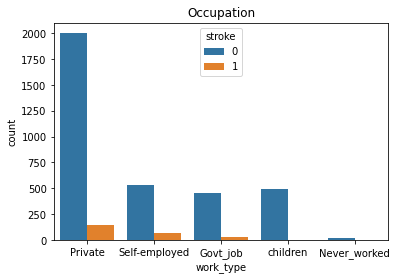

In [ ]:
sns.countplot(x='work_type', hue = 'stroke', data = normalized_stroke)
plt.title('Occupation')
plt.show()

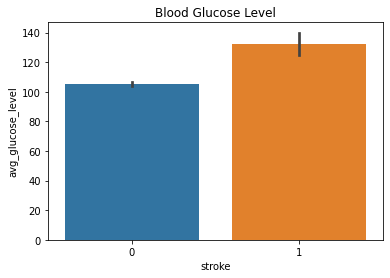

In [ ]:
sns.barplot(x='stroke', y = 'avg_glucose_level', data = normalized_stroke)
plt.title('Blood Glucose Level')
plt.show()

In [ ]:
residence = pd.get_dummies(normalized_stroke['Residence_type'])
residence.head()

,Rural,Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [ ]:
residence = pd.get_dummies(normalized_stroke["Residence_type"], drop_first= True)
normalized_stroke.drop(["Residence_type"], axis = 1, inplace = True)
normalized_stroke = pd.concat([normalized_stroke, residence], axis = 1)
normalized_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke,Urban
0,9046,Male,67.0,0,1,Yes,Private,228.69,36.6,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,202.21,28.6,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,105.92,32.5,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,171.23,34.4,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,174.12,24.0,never smoked,1,0


In [ ]:
normalized_stroke.rename(columns={'Urban':'Residence_type'}, 
                 inplace=True)

In [ ]:
sex = pd.get_dummies(normalized_stroke['gender'])
sex = pd.get_dummies(normalized_stroke["gender"], drop_first= True)
normalized_stroke.drop(["gender"], axis = 1, inplace = True)
normalized_stroke = pd.concat([normalized_stroke, sex], axis = 1)

In [ ]:
marital_status = pd.get_dummies(normalized_stroke['ever_married'])

In [ ]:
marital_status = pd.get_dummies(normalized_stroke["ever_married"], drop_first= True)

In [ ]:
normalized_stroke.drop(["ever_married", "smoking_status"], axis = 1, inplace = True)

In [ ]:
normalized_stroke = pd.concat([normalized_stroke, marital_status], axis = 1)

In [ ]:
normalized_stroke.rename(columns={'Yes':'marital_status'}, 
                 inplace=True)

In [ ]:
occupation = pd.get_dummies(normalized_stroke['work_type'])

In [ ]:
normalized_stroke.drop(["work_type"], axis = 1, inplace = True)

In [ ]:
normalized_stroke = pd.concat([normalized_stroke, occupation], axis = 1)

In [ ]:
normalized_stroke.drop(["avg_glucose_level"], axis = 1, inplace = True)

In [ ]:
normalized_stroke.head()

,id,age,hypertension,heart_disease,bmi,stroke,Residence_type,Male,Other,marital_status,Govt_job,Never_worked,Private,Self-employed,children
0,9046,67.0,0,1,36.6,1,1,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,28.6,1,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,32.5,1,0,1,0,1,0,0,1,0,0
3,60182,49.0,0,0,34.4,1,1,0,0,1,0,0,1,0,0
4,1665,79.0,1,0,24.0,1,0,0,0,1,0,0,0,1,0


In [ ]:
normalized_stroke.drop(["id"], axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = normalized_stroke.drop('stroke', axis = 1)
y = normalized_stroke['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1046
           1       0.00      0.00      0.00        79

    accuracy                           0.93      1125
   macro avg       0.46      0.50      0.48      1125
weighted avg       0.86      0.93      0.90      1125



In [ ]:
logmodel.score(X_test, y_test)

0.9288888888888889

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[1045    1]
 [  79    0]]


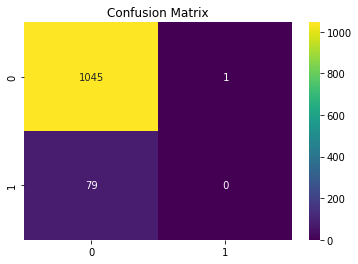

In [ ]:
sns.heatmap(confusion_matrix(y_test,predictions), annot= True, cmap = 'viridis', fmt="2")
plt.title('Confusion Matrix')
plt.show()